# This notebook queries the NintendoTweets dataset to discover some of the popular forms of tweets

In [0]:
from pyspark.sql.functions import *
import seaborn as sns

In [0]:
sqlContext
nt = sqlContext.read.load('/FileStore/tables/NintendoTweets.json', format='json', header=True)

In [0]:
nt.show(5)

+------------+-----------+--------------------+------------------+--------------------+-----------------+--------------+--------------+---------+------------+----+-------------------+-------------------+-----------------------+---------------------+-------------------------+-------------------+-----------------------+---------------+----+-----+-----+------------------+-----------+-------------+----------------+--------------------+-----------------------+-----------+-------------+---------+--------------------+--------------------+--------------------+-------------+---------+--------------------+
|contributors|coordinates|          created_at|display_text_range|            entities|extended_entities|extended_tweet|favorite_count|favorited|filter_level| geo|                 id|             id_str|in_reply_to_screen_name|in_reply_to_status_id|in_reply_to_status_id_str|in_reply_to_user_id|in_reply_to_user_id_str|is_quote_status|lang|limit|place|possibly_sensitive|quote_count|quoted_status

# Data Cleaning

In [0]:
# drop the columns that we will not be using for our analysis (a lot of rows)
nt = nt.drop("contributors", "coordinates", "created_at", "display_text_range", "extended_entities", "extended_tweet", "favorite_count", "favorited", "filter_level", "geo", "id",                                                  "id_str", "in_reply_to_screen_name","in_reply_to_status_id", "in_reply_to_status_id_str", "in_reply_to_user_id", "in_reply_to_user_id_str", "is_quote_status", "limit", "place", 
             "possibly_sensitive", "quote_count",  "quoted_status", "quoted_status_id", "quoted_status_id_str", "quoted_status_permalink", "reply_count", "retweet_count", "retweeted", "retweeted_status",                          "timestamp_ms", "truncated", "user")
nt.show(5)

+--------------------+----+--------------------+--------------------+
|            entities|lang|              source|                text|
+--------------------+----+--------------------+--------------------+
|{[{[12, 27], Nint...|  en|<a href="http://t...|IT BEGINS!! #Nint...|
|{[{[73, 84], Nint...|  en|<a href="http://t...|RT @funkemcfly: l...|
|{[{[59, 66], E320...|  en|<a href="http://t...|The Nintendo pres...|
|{[{[56, 67], Nint...|  es|<a href="http://t...|RT @CelopanYT: VI...|
|{[{[14, 25], Nint...|  en|<a href="http://t...|YO HERE WE GO #Ni...|
+--------------------+----+--------------------+--------------------+
only showing top 5 rows



In [0]:
nt_rows = nt.count()
print("number of rows before: " + str(nt_rows))

# drop all rows which just contain null values
nt = nt.na.drop(how='all')

nt_rows = nt.count()
print("number of rows after: " + str(nt_rows))

number of rows before: 104695
number of rows after: 103441


# Analysis
## 1. What are the most popular languages people are tweeting in?

In [0]:
# Query for the most popular languages tweeted in
languages = nt.groupBy("lang").count().sort(desc("count"))
display(languages)

lang,count
en,71441
es,10777
fr,7490
und,3032
de,2963
ja,2479
pt,1172
in,552
no,525
it,436


#### Answer: English is the most popular language by far with a large gap between first and second place which is spanish

## 2. What platforms/devices are most popular to be tweeted from?

In [0]:
# Query to show from what platforms/devices are most popular to be tweeted from
nt = nt.withColumn("right_of_tag", substring_index(nt.source, '>', -2))
nt = nt.withColumn("source_tag", substring_index(nt.right_of_tag, '<', 1))
display(nt.groupBy("source_tag").count().sort(desc("count")))

source_tag,count
Twitter for Android,31702
Twitter Web Client,30846
Twitter for iPhone,25968
TweetDeck,7881
Twitter Lite,1983
Twitter for iPad,1172
Tweetbot for iΟS,733
Tweetbot for Mac,554
Media Studio,183
Facebook,150


#### Answer: The top 3 are miles ahead of the rest with Android as the most popular device to tweet from followed closely by tweets from the twitter website. Lastly to round out the top three are tweets from iPhone devices

## 3. What are the most popular hashtags for Nintendo tweets?

In [0]:
entities = nt.select("entities").collect()
hashtags = list()
hashtag_count = list()
i = 0
for row in entities:
    i += 1
    if row["entities"] is not None:
        if row["entities"]["hashtags"] is not None:
            for hashtag in row["entities"]["hashtags"]:
                if hashtag["text"] not in hashtags:
                    hashtags.append(hashtag["text"])
                    hashtag_count.append(1)
                else:
                    index = hashtags.index(hashtag["text"])
                    hashtag_count[index] += 1

In [0]:
new_hashtags = list()
new_hashtag_count = list()

# only include hashtags with a count of more than 500 to a new list so we do not have a crowded graph filled with hashtags that were not used many times
for i in range(0, len(hashtag_count)-1):
    if hashtag_count[i] > 500:
        new_hashtag_count.append(hashtag_count[i])
        new_hashtags.append(hashtags[i])
        
print(new_hashtags)
print(new_hashtag_count)

['NintendoDirect', 'NintendoE3', 'E3', 'E32018', 'NintendoSwitch', 'nintendoe3', 'E3JVCom', 'e32018', 'Nintendo', 'e3', 'GameSpotE3', 'SuperSmashBros', 'SmashBros', 'SmashBrosSwitch', 'XenobladeChronicles2', 'MarioParty', 'FireEmblem', 'Fortnite', 'eShop', 'SuperSmashBrosUltimate', 'SmashBrosUltimate']
[16782, 70836, 9103, 31662, 8399, 969, 876, 516, 707, 1283, 1346, 1711, 9498, 1333, 614, 867, 1810, 1140, 717, 1308, 692]


Out[87]: [Text(0.5, 0, 'Hashtag Count'), Text(0, 0.5, 'Hashtag')]

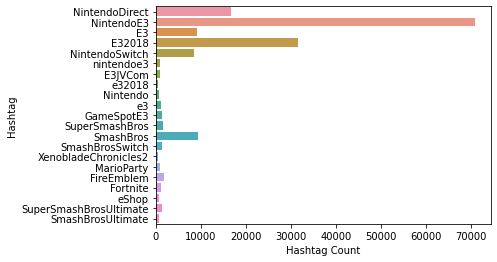

In [0]:
chart = sns.barplot(x=new_hashtag_count,y=new_hashtags, orient='h')
chart.set(xlabel='Hashtag Count', ylabel='Hashtag')

#### Answer: The most popular hashtag is #NintendoE3 followed by #E32018 then finally #NintendoDirect as shown by the bar chart

## Bonus: Reggie Fils-Aimé is the president and chief operating officer of Nintendo. The next query discovers what percentage of Nintendo tweets mention Reggie

In [0]:
# Query to find which tweets mention "reggie"
reggies = nt.filter(nt.text.ilike("%reggie%")).select("text")
nt_rows = nt.count()
reggies_rows = reggies.count()
# Calculate a percentage based on the number of tweets mentioning reggie and total number of rows
reggie_percentage = (reggies_rows / nt_rows) * 100
print(str(reggie_percentage) + "% of tweets mention 'Reggie'")

1.0721087383145949% of tweets mention 'Reggie'
